# **Proyek Analisis Data : Bike Sharing Dataset**
- **Nama            : Galang Satriamahesa Putra Dewa**
- **Email Dicoding  : galangsatriamahesa.pd@gmail.com**
- **Email Bangkit   : m297d4ky2713@bangkit.academy**
- **ID Dicoding     : Galang Satriamahesa Putra Dewa**

## **Menentukan Pertantanyaan Bisnis**

- Apakah terdapat tren peningkatan atau penurunan dalam jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## **Import Semua Packages/Library yang Digunakan**

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

## **Data Wrangling**

### Gathering Data

- Memuat tabel day

In [164]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Memuat tabel hour

In [165]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

1. Menilai Data day_df

- Menampikan **informasi** data day_df

In [166]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Menampilkan informasi terkait jumlah **missing values** dari data day_df

In [167]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Menampilkan informasi terkait jumlah **duplikasi data** dari data day_df

In [168]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Menampilkan informasi terkait jumlah **nilai unik** dari data day_df

In [169]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

- Menampilkan ringkasan **parameter statistik** dari data day_df

In [170]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. Menilai Data hour_df

- Menampikan **informasi** data hour_df

In [171]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Menampilkan informasi terkait jumlah **missing values** dari data hour_df

In [172]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Menampilkan informasi terkait jumlah **duplikasi data** dari data hour_df

In [173]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Menampilkan informasi terkait jumlah **nilai unik** dari data hour_df

In [174]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

- Menampilkan ringkasan **parameter statistik** dari data hour_df

In [175]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dari hasil Assessing Data, tidak ditemukan masalah atau kesalahan dalam data seperti missing value, duplikasi, dan invalid value. Oleh karena itu tidak diperlukan proses pembersihan data

## **Exploratory Data Analysis**

### 1. Eksplor Data day_df

- Menampilkan 5 baris pertama dari data day_df

In [176]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Menampilkan ringkasan **parameter statistik** dari data day_df

In [177]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- Menampilkan jumlah total penyewaan sepeda setiap tahun (0: 2011, 1: 2012)

In [178]:
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
1    2049576
0    1243103
Name: cnt, dtype: int64

- Menampilkan jumlah total penyewaan sepeda setiap musim (1: springer, 2: summer, 3: fall, 4: winter)

In [179]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

- Menampilkan jumlah total penyewaan sepeda setiap kondisi cuaca 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [180]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

### 2. Eksplor Data hour_df

- Menampilkan 5 baris pertama dari data hour_df

In [181]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- Menampilkan ringkasan **parameter statistik** dari data hour_df

In [182]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


- Menampilkan jumlah total penyewaan sepeda setiap tahun (0: 2011, 1: 2012)

In [183]:
hour_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
1    2049576
0    1243103
Name: cnt, dtype: int64

- Menampilkan jumlah total penyewaan sepeda setiap musim (1: springer, 2: summer, 3: fall, 4: winter)

In [184]:
hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

- Menampilkan jumlah total penyewaan sepeda setiap kondisi cuaca 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [185]:
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

## **Visualisasi Data & Explanatory Analysis**

### 1. Apakah terdapat tren peningkatan atau penurunan dalam jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012?

Dikarenakan hasil fungsi jumlah total penyewaan sepeda setiap tahun dari day_df dan hour_df sama, maka bisa dipilih salah satu untuk digunakan untuk visualisasi yang disini Saya menggunakan day_df

In [186]:
# Memasukkan fungsi jumlah total penyewaan sepeda setiap tahun kedalam variable banyak_pertahun_
banyak_pertahun_day = day_df.groupby(by="yr").cnt.sum().sort_values()

# Membuat dataframe dari variable tersebut
df_banyak_pertahun_day = pd.DataFrame({
    "Tahun" : banyak_pertahun_day.index,
    "Jumlah Sewa Sepeda" : banyak_pertahun_day.values 
})

# Mengganti nama tahun dari (0: 2011, 1: 2012)
df_banyak_pertahun_day['Tahun'] = df_banyak_pertahun_day['Tahun'].replace({0: "2011", 1: "2012"})

Mengvisualisasikan dataframe df_banyak_pertahun_day dengan bar chart

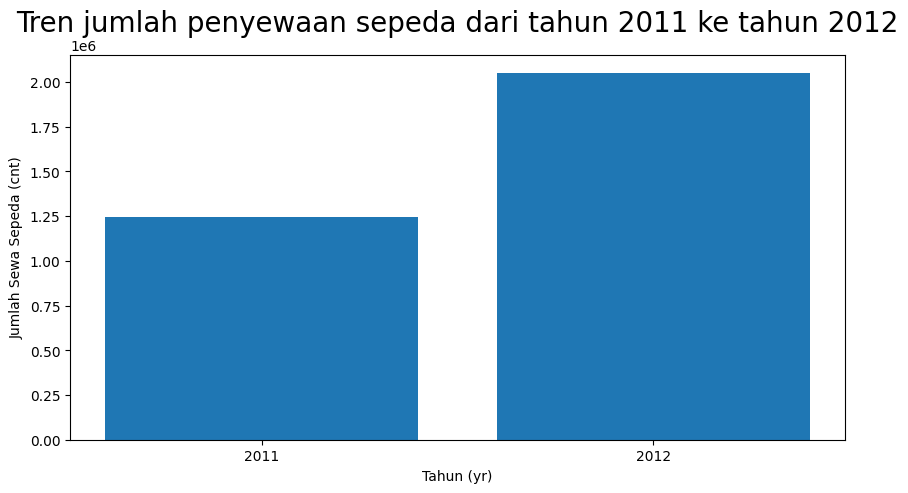

In [187]:
# Ukuran Figure
plt.figure(figsize=(10, 5)) 
# Vertical Bar Plot
plt.bar(x = df_banyak_pertahun_day["Tahun"], height= df_banyak_pertahun_day["Jumlah Sewa Sepeda"]) 
# Menampilkan Title
plt.title("Tren jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012", loc="center", fontsize=20) 
# Memberi label pada sumbu x
plt.xlabel("Tahun (yr)")
# Memberi label pada sumbu y
plt.ylabel("Jumlah Sewa Sepeda (cnt)")
# Menampilkan Plot
plt.show()

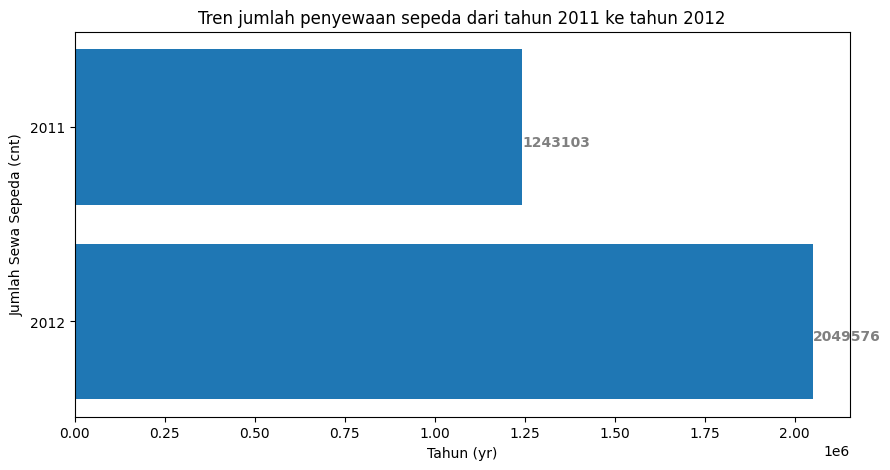

In [188]:
# Ukuran Figure
fig, ax = plt.subplots(figsize =(10, 5))
tahun = df_banyak_pertahun_day["Tahun"]
banyak = df_banyak_pertahun_day["Jumlah Sewa Sepeda"]
# Horizontal Bar Plot
ax.barh(tahun, banyak)
# Menampilkan top value
ax.invert_yaxis()
# Menambah notasi pada bar
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Menambah title
ax.set_title('Tren jumlah penyewaan sepeda dari tahun 2011 ke tahun 2012')
# Memberi label pada sumbu x
plt.xlabel("Tahun (yr)")
# Memberi label pada sumbu y
plt.ylabel("Jumlah Sewa Sepeda (cnt)")
# Menampilkan Plot
plt.show()

Persentase Kenaikan Penyewaan Sepeda dari 2011 ke 2012

In [189]:
persen_kenaikan = (df_banyak_pertahun_day["Jumlah Sewa Sepeda"].max()-df_banyak_pertahun_day["Jumlah Sewa Sepeda"].min())/df_banyak_pertahun_day["Jumlah Sewa Sepeda"].min()
print(f"Persentase Kenaikan : {persen_kenaikan:.2%}")

Persentase Kenaikan : 64.88%


**Insight:**
- Pada tahun 2011, jumlah penyewaan sepeda mencapai sekitar 1.24 juta
- Pada tahun 2012, jumlah penyewaan sepeda mengalami kenaikan sebesar 65%, yaitu mencapai 2.04 juta.    
<br>

### 2. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

Dikarenakan hasil fungsi jumlah total penyewaan sepeda setiap musim dari day_df dan hour_df sama, maka bisa dipilih salah satu untuk digunakan untuk visualisasi yang disini Saya menggunakan day_df

In [190]:
# Memasukkan fungsi jumlah total penyewaan sepeda setiap musim kedalam variable banyak_musim_
banyak_musim_day = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

# Membuat dataframe dari variable tersebut
df_banyak_musim_day = pd.DataFrame({
    "Musim" : banyak_musim_day.index,
    "Jumlah Sewa Sepeda" : banyak_musim_day.values 
})

# Mengganti nama musim dari (1: springer, 2: summer, 3: fall, 4: winter)
df_banyak_musim_day['Musim'] = df_banyak_musim_day['Musim'].replace({1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"})

Mengvisualisasikan dataframe df_banyak_musim_day dengan bar chart

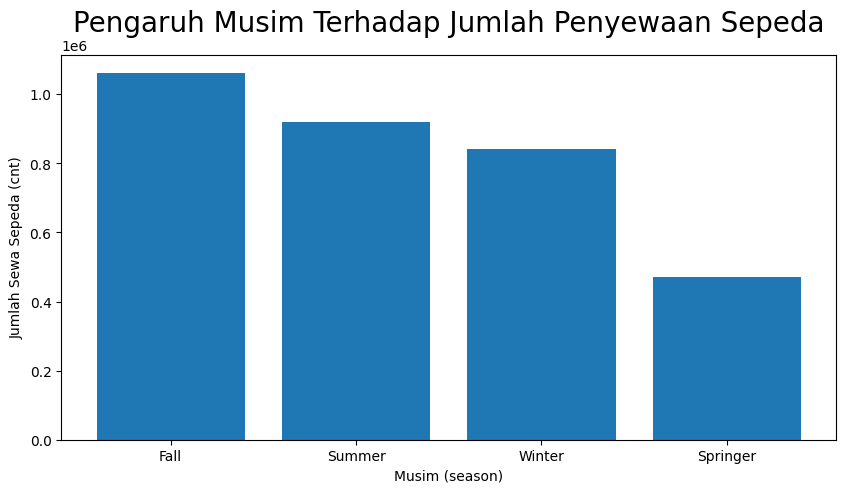

In [191]:
# Ukuran Figure
plt.figure(figsize=(10, 5)) 
# Vertical Bar Plot
plt.bar(x = df_banyak_musim_day["Musim"], height= df_banyak_musim_day["Jumlah Sewa Sepeda"]) 
# Menampilkan Title
plt.title("Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda", loc="center", fontsize=20) 
# Memberi label pada sumbu x
plt.xlabel("Musim (season)")
# Memberi label pada sumbu y
plt.ylabel("Jumlah Sewa Sepeda (cnt)")
# Menampilkan Plot
plt.show()

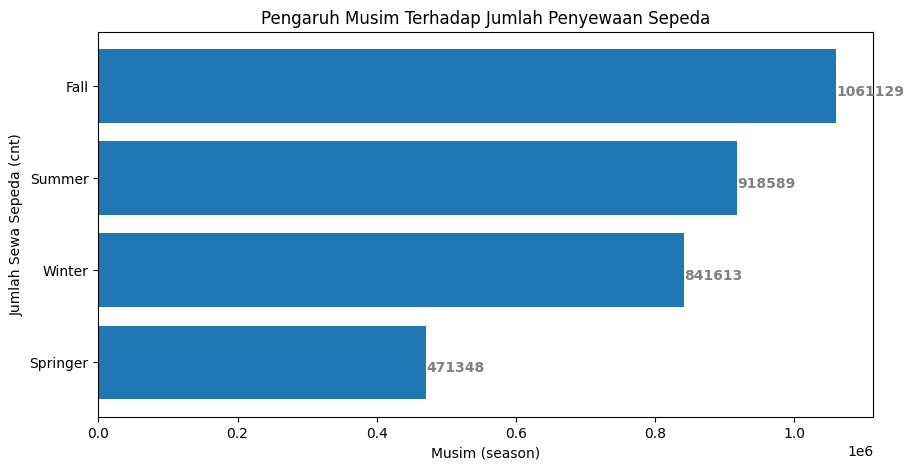

In [192]:
# Ukuran Figure
fig, ax = plt.subplots(figsize =(10, 5))
musim = df_banyak_musim_day["Musim"]
banyak = df_banyak_musim_day["Jumlah Sewa Sepeda"]
# Horizontal Bar Plot
ax.barh(musim, banyak)
# Menampilkan top value
ax.invert_yaxis()
# Menambah notasi pada bar
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Menambah title
ax.set_title('Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda')
# Memberi label pada sumbu x
plt.xlabel("Musim (season)")
# Memberi label pada sumbu y
plt.ylabel("Jumlah Sewa Sepeda (cnt)")
# Menampilkan Plot
plt.show()

**Insight:**
- Pada musim Fall, jumlah jumlah penyewa sepeda mencapai nilai tertinggi yaitu 1.06 juta
- Pada musim Springer, jumlah jumlah penyewa sepeda mencapai nilai terendah yaitu 470 ribu
<br><br>

### 3. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Visualisasi data day_df

In [193]:
# Memasukkan fungsi jumlah total penyewaan sepeda setiap kondisi cuaca kedalam variable banyak_cuaca_
banyak_cuaca_day = day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

# Membuat dataframe dari variable tersebut
df_banyak_cuaca_day = pd.DataFrame({
    "Cuaca" : banyak_cuaca_day.index,
    "Jumlah Sewa Sepeda" : banyak_cuaca_day.values 
})


# Mengganti nama cuaca menjadi string
df_banyak_cuaca_day['Cuaca'] = df_banyak_cuaca_day['Cuaca'].replace({1: "1", 2: "2", 3: "3"})

Mengvisualisasikan dataframe df_banyak_cuaca_day dengan bar chart

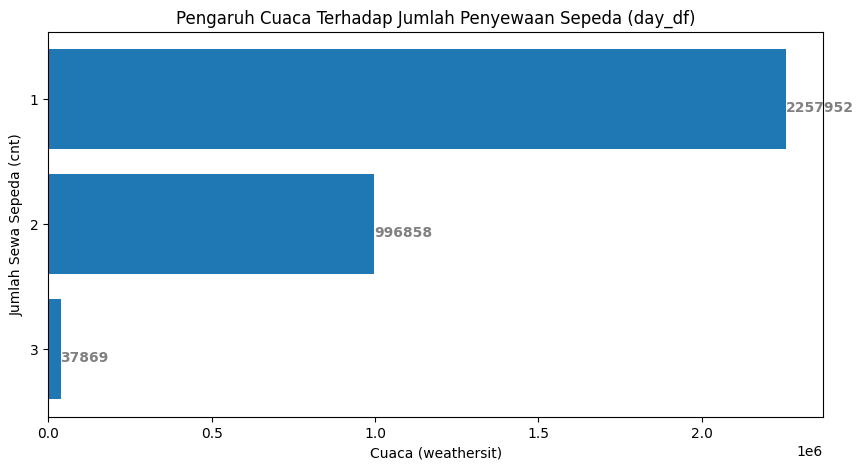

In [194]:
# Ukuran Figure
fig, ax = plt.subplots(figsize =(10, 5))
cuaca = df_banyak_cuaca_day["Cuaca"]
banyak = df_banyak_cuaca_day["Jumlah Sewa Sepeda"]
# Horizontal Bar Plot
ax.barh(cuaca, banyak)
# Menampilkan top value
ax.invert_yaxis()
# Menambah notasi pada bar
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Menambah title
ax.set_title('Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda (day_df)')
# Memberi label pada sumbu x
plt.xlabel("Cuaca (weathersit)")
# Memberi label pada sumbu y
plt.ylabel("Jumlah Sewa Sepeda (cnt)")
# Menampilkan Plot
plt.show()

Visualisasi data hour_df

In [195]:
# Memasukkan fungsi jumlah total penyewaan sepeda setiap kondisi cuaca kedalam variable banyak_cuaca_
banyak_cuaca_hour = hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

# Membuat dataframe dari variable tersebut
df_banyak_cuaca_hour = pd.DataFrame({
    "Cuaca" : banyak_cuaca_hour.index,
    "Jumlah Sewa Sepeda" : banyak_cuaca_hour.values 
})
# Mengganti nama cuaca menjadi string
df_banyak_cuaca_hour['Cuaca'] = df_banyak_cuaca_hour['Cuaca'].replace({1: "1", 2: "2", 3: "3", 4: "4"})

Mengvisualisasikan dataframe df_banyak_cuaca_hour dengan bar chart

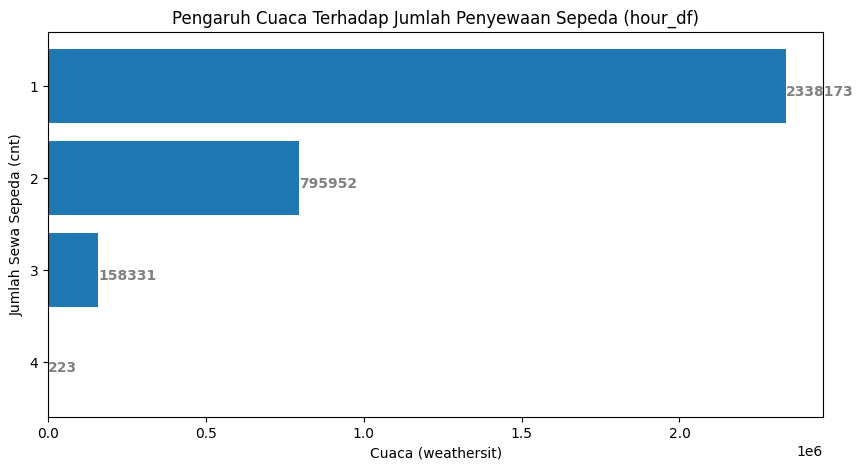

In [196]:
# Ukuran Figure
fig, ax = plt.subplots(figsize =(10, 5))
cuaca = df_banyak_cuaca_hour["Cuaca"]
banyak = df_banyak_cuaca_hour["Jumlah Sewa Sepeda"]
# Horizontal Bar Plot
ax.barh(cuaca, banyak)
# Menampilkan top value
ax.invert_yaxis()
# Menambah notasi pada bar
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Menambah title
ax.set_title('Pengaruh Cuaca Terhadap Jumlah Penyewaan Sepeda (hour_df)')
# Memberi label pada sumbu x
plt.xlabel("Cuaca (weathersit)")
# Memberi label pada sumbu y
plt.ylabel("Jumlah Sewa Sepeda (cnt)")
# Menampilkan Plot
plt.show()

**Description**
weathersit :

* 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
* 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
* 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
* 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

**Insight:**

- Dari kedua visualisasi day_df dan hour_df, kondisi cuaca 1 (Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian) memiliki jumlah penyewa sepeda paling banyak.
- Dari visualisasi day_df, kondisi cuaca 3 (Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan) memiliki jumlah penyewa sepeda paling sedikit.
- Dari visualisasi hour_df, kondisi cuaca 4 (Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut) memiliki jumlah penyewa sepeda paling sedikit.
<br><br>

## **Conclusion**

- **Tren Pertumbuhan Tahunan**: Jumlah penyewaan sepeda mengalami peningkatan yang signifikan dari tahun 2011 hingga tahun 2012. Dengan jumlah penyewaan meningkat dari sekitar 1.24 juta pada tahun 2011 menjadi sekitar 2.04 juta pada tahun 2012, ini menunjukkan adanya pertumbuhan yang positif dalam bisnis penyewaan sepeda. Kenaikan sebesar 65% dari tahun sebelumnya menunjukkan bahwa bisnis ini sedang berkembang pesat.

- **Pengaruh Musim terhadap jumlah penyewa sepeda**: Musim Fall (musim gugur) memiliki jumlah penyewaan sepeda tertinggi, mencapai 1.06 juta, sementara musim Springer (musim semi) memiliki jumlah penyewaan terendah, yaitu hanya sekitar 470 ribu. Ini menunjukkan bahwa musim gugur mungkin menjadi waktu yang paling populer bagi masyarakat untuk melakukan aktivitas sepeda.

- **Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda**: Kondisi cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda. Kondisi cuaca yang cerah dengan sedikit awan atau berawan sebagian memiliki jumlah penyewaan sepeda yang paling banyak. Sementara itu, kondisi cuaca yang tidak menyenangkan seperti salju ringan, hujan ringan dengan badai petir, atau hujan ringan dengan awan berserakan, memiliki jumlah penyewaan sepeda yang paling sedikit. Ini menunjukkan bahwa cuaca yang baik lebih mempengaruhi minat masyarakat untuk melakukan aktivitas sepeda.